In [1]:
import pandas as pd
import os

folder_path = os.path.join(os.getcwd(), 'data')
file_list = [folder_path + '/' + file for file in os.listdir(folder_path)]

df = pd.read_csv(file_list[0])

for file in file_list[1:]:
    new_df = pd.read_csv(file)
    df = pd.concat((df, new_df), axis=0, ignore_index=True)

In [ ]:
df['updated'] = pd.to_datetime(df['updated'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   _id          int64         
 1   device_id    int64         
 2   days         int64         
 3   sex          int64         
 4   temperature  int64         
 5   updated      datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.2 GB


In [54]:
del df['_id']

In [ ]:
df

,device_id,days,sex,temperature,updated
0,2179,836,1,3127,2023-05-18 16:42:03
1,2179,836,1,3127,2023-05-18 16:42:02
2,2179,836,1,3127,2023-05-18 16:42:01
3,2179,836,1,3127,2023-05-18 16:42:00
4,2179,836,1,3127,2023-05-18 16:41:59
...,...,...,...,...,...
49999995,2358,784,0,2810,2023-10-25 15:32:13
49999996,2358,784,0,2810,2023-10-25 15:32:12
49999997,2358,784,0,2810,2023-10-25 15:32:11
49999998,2358,784,0,2810,2023-10-25 15:32:10


In [ ]:
df

### 0. 2410 아기 EDA

- 여아, 2년 10개월 ~ 3년 4개월

In [17]:
baby = df[df['device_id']==2410]
baby.reset_index(drop=True, inplace=True)

In [18]:
del baby['device_id']
del baby['sex']

In [19]:
baby

,days,temperature,updated
0,1051,3228,2023-05-18 13:08:37
1,1051,3229,2023-05-18 13:08:36
2,1051,3229,2023-05-18 13:08:35
3,1051,3230,2023-05-18 13:08:34
4,1051,3230,2023-05-18 13:08:33
...,...,...,...
4249886,1211,-1,2023-10-25 22:04:59
4249887,1211,-1,2023-10-25 22:04:58
4249888,1211,-1,2023-10-25 22:04:57
4249889,1211,-1,2023-10-25 22:04:56


In [20]:
len(baby['updated'].dt.date.astype('str').unique())

150

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def draw_graph(date):
    one_baby = baby[baby['updated'].dt.date.astype('str') == date]
    # one_baby = one_baby.drop(one_baby[one_baby['temperature'].isin([0, -1])].index)
    # sns.lineplot(x=one_baby['updated'].dt.time.astype('str'), y=one_baby['temperature'])

    second_baby = one_baby.set_index('updated')
    second_baby = second_baby.resample("T").mean()
    second_baby['temperature'] = second_baby['temperature'].apply(lambda x:round(x,0))

    # 데이터를 시각화합니다.
    plt.figure(figsize=(10,5))
    plt.plot(second_baby.index, second_baby['temperature'])

    # x축을 시간 단위로 설정합니다.
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # x축을 24시간으로 고정합니다.
    ax.set_xlim(second_baby.index[0], second_baby.index[0] + pd.Timedelta(days=1))

    # x축의 간격을 1시간으로 설정합니다.
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    

    # 그래프의 제목과 x축, y축 레이블을 설정합니다.
    plt.title(date)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.ylim((1500,4500))


    # 그리드를 표시합니다.
    plt.grid(True)

    # 그래프를 출력합니다.
    plt.show()

In [ ]:
date_list = baby['updated'].dt.date.astype('str').unique()

for i in range(len(date_list)):
    print(date_list[i])
    draw_graph(date_list[i])

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def draw_graph(date):
    one_baby = baby[baby['updated'].dt.date.astype('str') == date]
    # one_baby = one_baby.drop(one_baby[one_baby['temperature'].isin([0, -1])].index)
    # sns.lineplot(x=one_baby['updated'].dt.time.astype('str'), y=one_baby['temperature'])

    second_baby = one_baby.set_index('updated')
    second_baby = second_baby.resample("T").mean()
    second_baby['temperature'] = second_baby['temperature'].apply(lambda x:round(x,0))

    # 데이터를 시각화
    plt.figure(figsize=(15,8))
    plt.plot(df_day.index, df_day['temperature'])

    # x축을 시간 단위로 설정
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # x축 범위를 00시부터 24시까지로 설정
    ax.set_xlim([pd.Timestamp(str(date.date())), pd.Timestamp(str(date.date())) + pd.DateOffset(days=1)])

    # # 데이터가 존재하는 시간에 맞춰 x축 눈금을 설정
    # ax.set_xticks(df_day.index)

    # 그래프의 제목과 x축, y축 레이블을 설정
    plt.title(f'Temperature on {date.date()}')
    plt.xlabel('Time')
    plt.ylabel('Temperature')

    # 그리드를 표시
    plt.grid(True)

    # 그래프를 출력
    plt.show()


    # 그래프를 출력합니다.
    plt.savefig(f'./img/2410-{date}')

### 1. 아기 가용 데이터 선별

In [66]:
df['device_id'].value_counts()[21:32]

device_id
606     700340
1946    448015
2273    396835
2358    346747
2256    342452
1868    330687
2357    320115
1816    316694
1304    285847
2340    279045
1416    278930
Name: count, dtype: int64

606 - 삭제
1946    가능
2273    가능
2358    가능
2256    가능
1868    불가
2357    가능
1816    불가
1304    가능
2340    가능
1416    가능

In [112]:
df[df['device_id']==1816]

,device_id,days,sex,temperature,updated
125,1816,321,0,2927,2023-05-18 16:42:03
126,1816,321,0,2927,2023-05-18 16:42:02
127,1816,321,0,2928,2023-05-18 16:42:01
128,1816,321,0,2927,2023-05-18 16:42:00
129,1816,321,0,2927,2023-05-18 16:41:59
...,...,...,...,...,...
35642686,1816,455,0,-1,2023-09-29 01:26:11
35642687,1816,455,0,-1,2023-09-29 01:26:10
35642688,1816,455,0,-1,2023-09-29 01:26:09
35642689,1816,455,0,-1,2023-09-29 01:26:08


18
2023-08-02


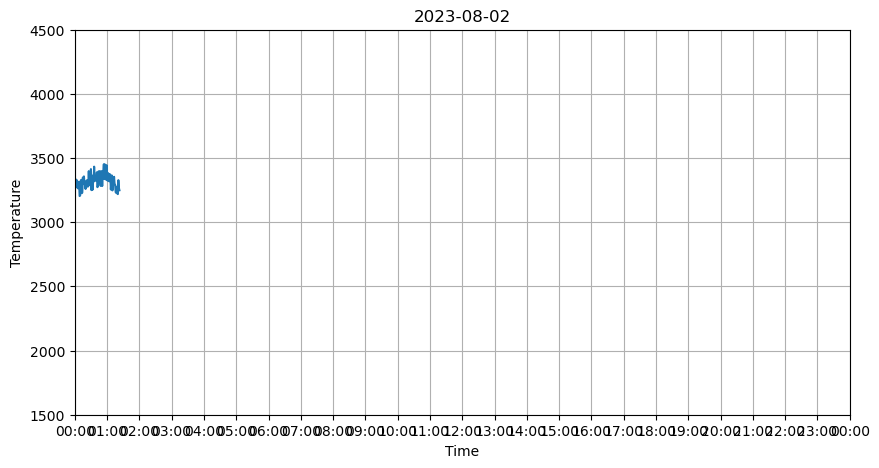

2023-08-01


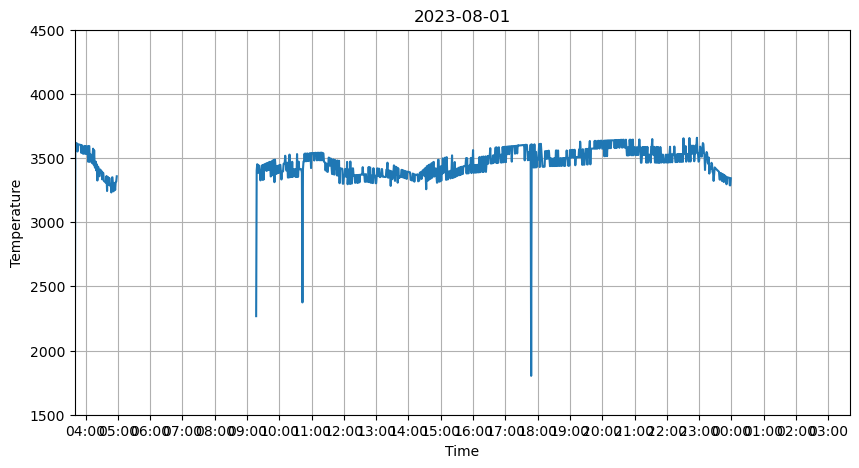

2023-07-31


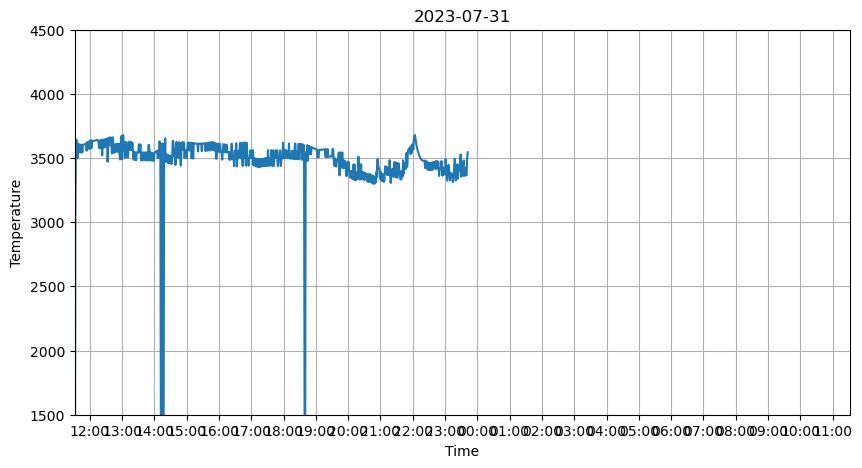

2023-07-30


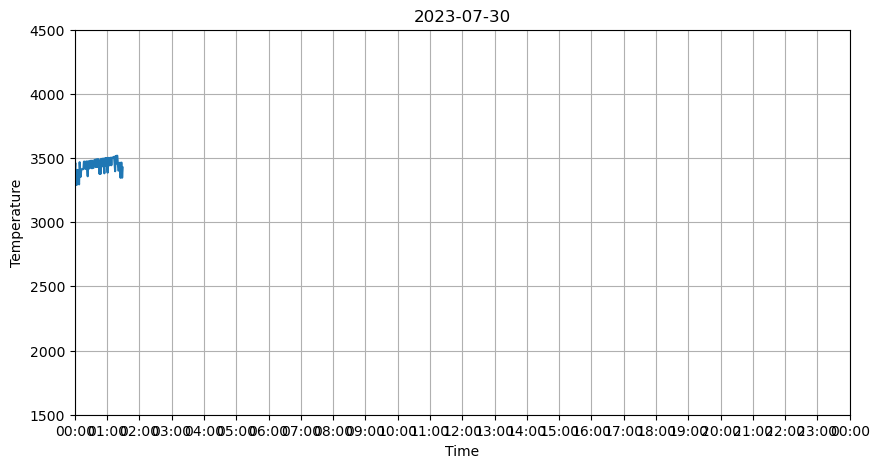

2023-07-29


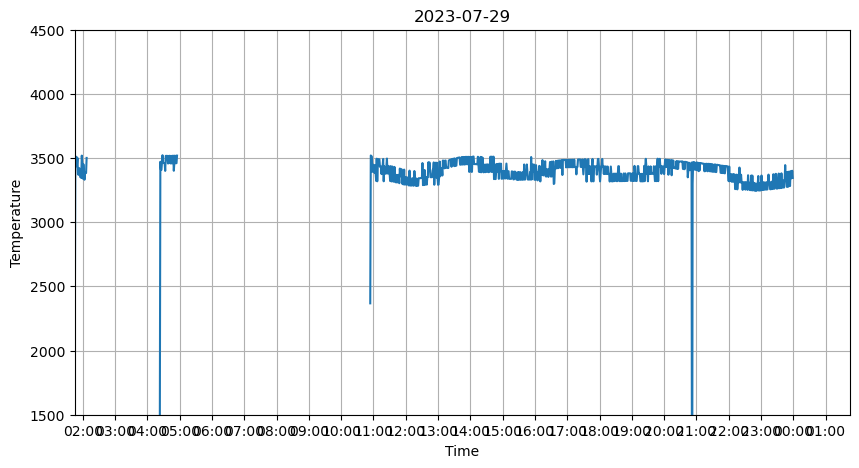

2023-07-26


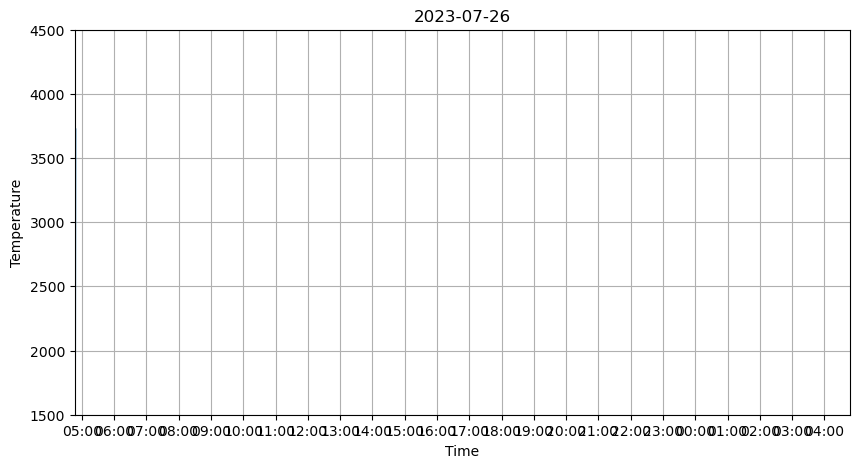

2023-07-24


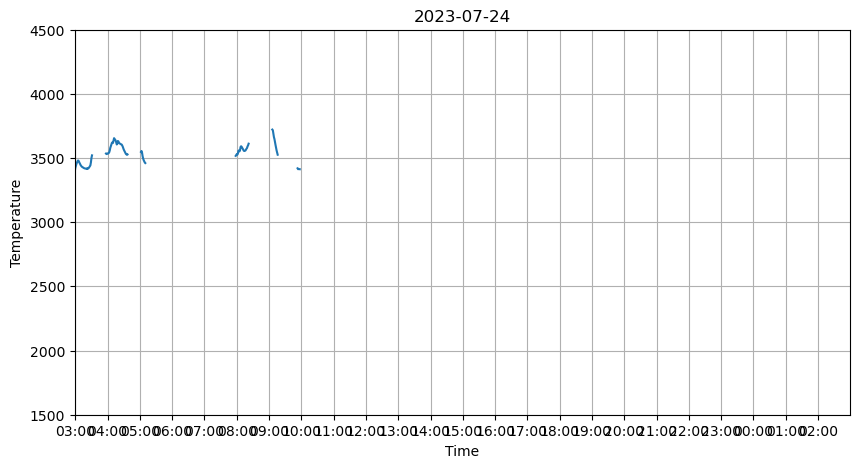

2023-07-22


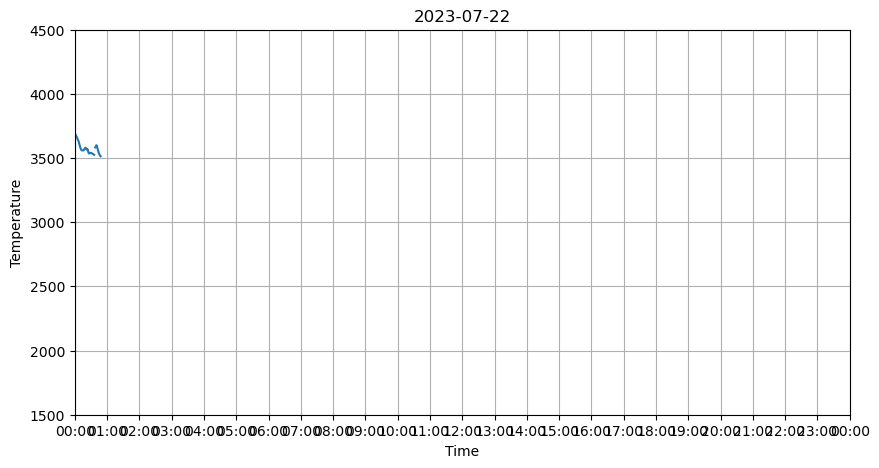

2023-07-21


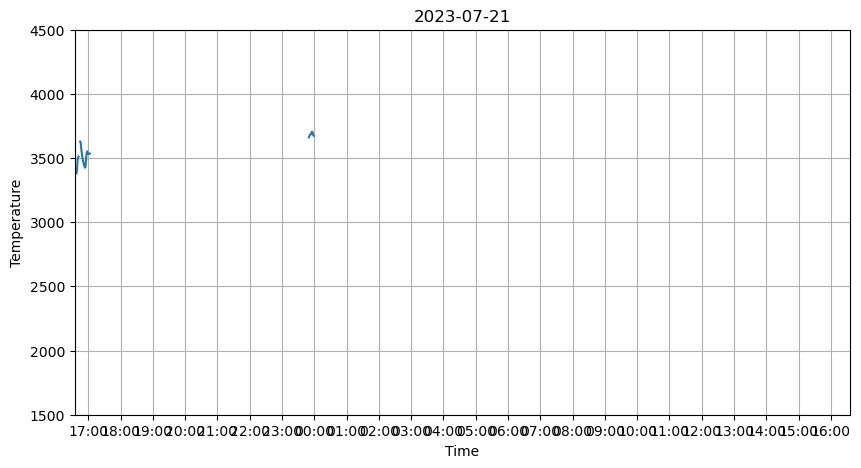

2023-08-28


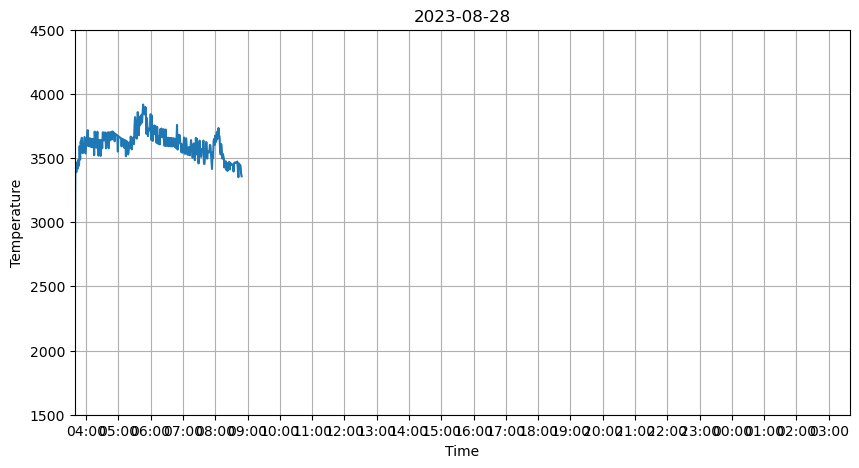

2023-08-25


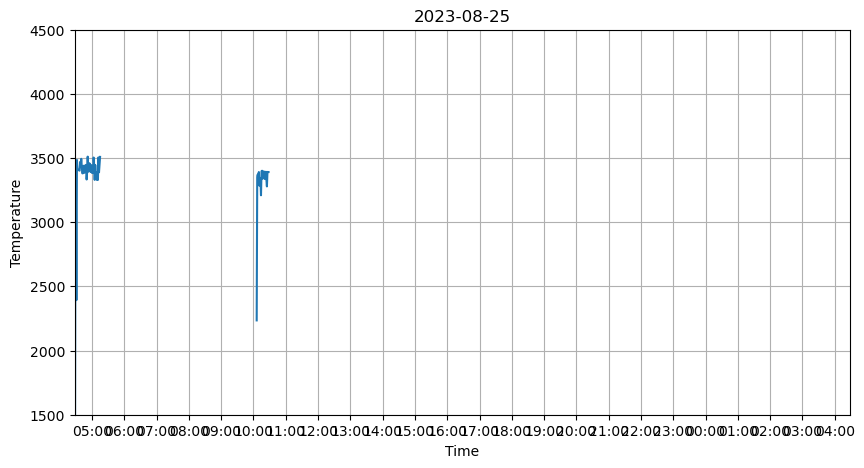

2023-08-16


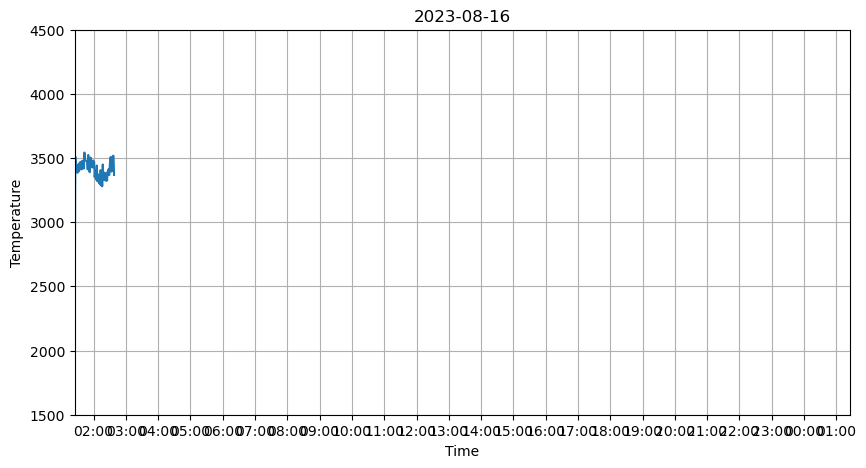

2023-09-09


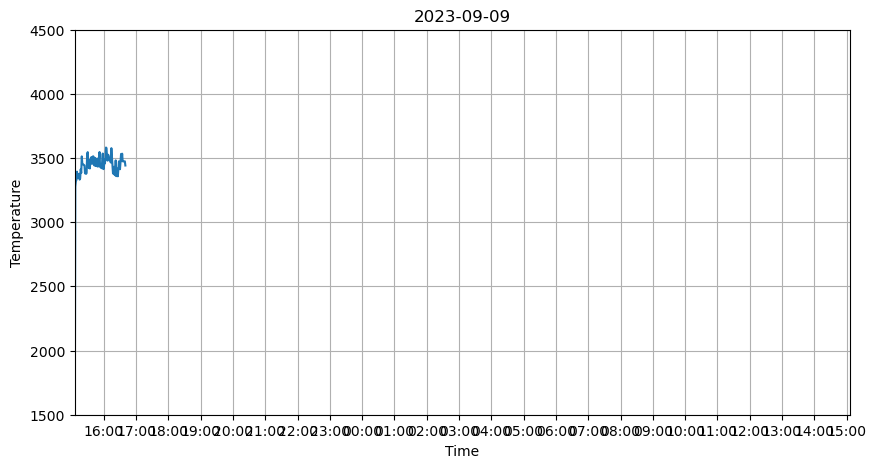

2023-10-25


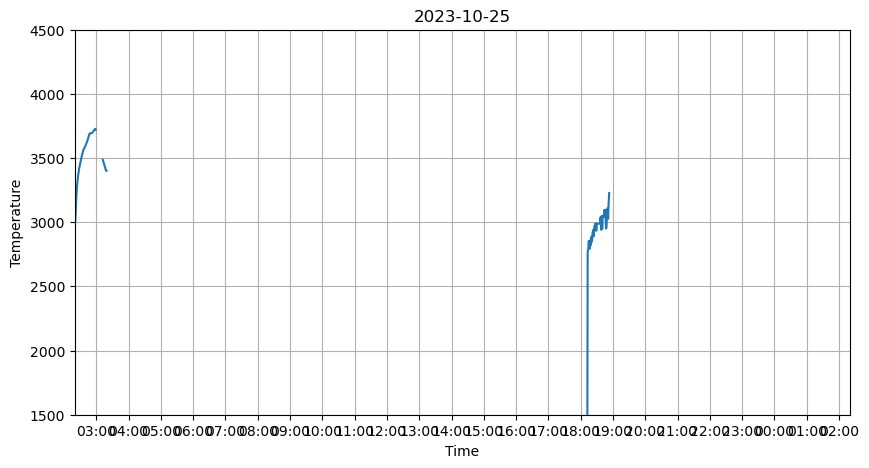

2023-10-24


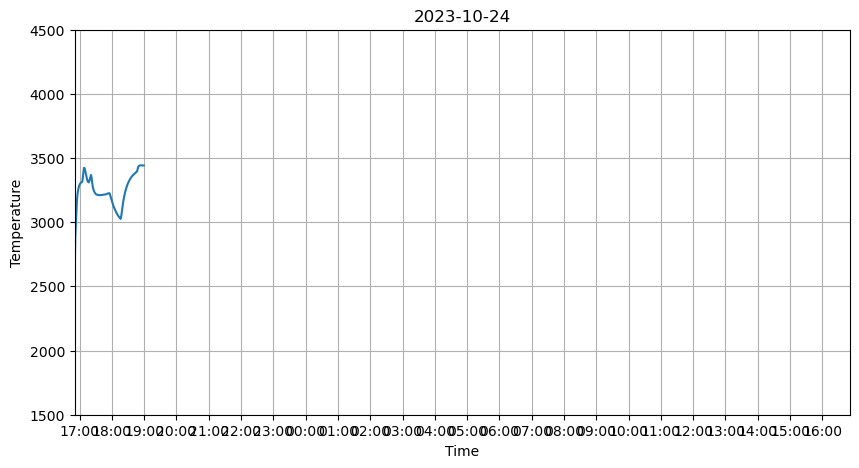

2023-10-30


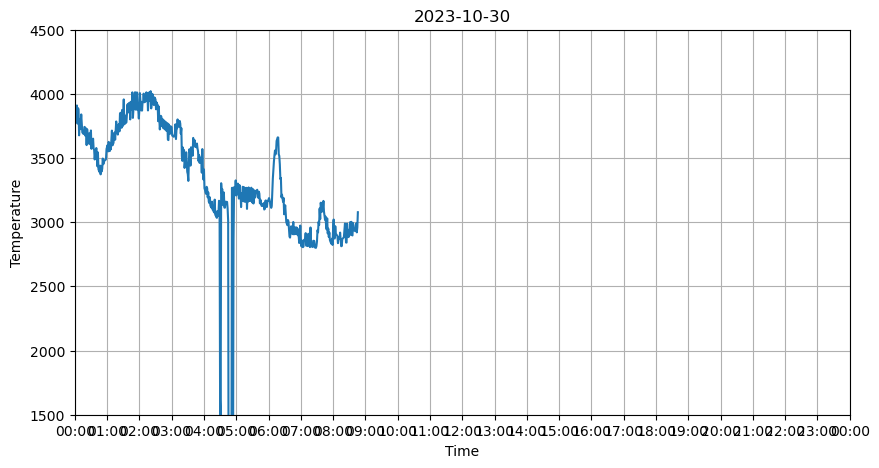

2023-10-29


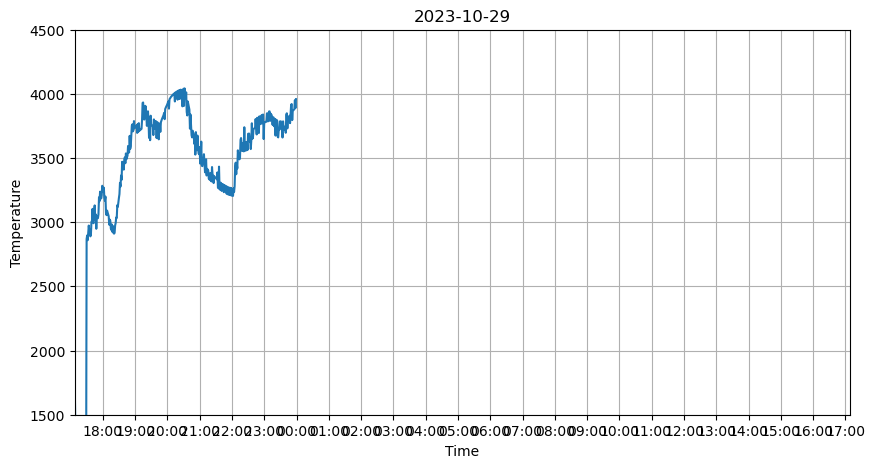

2023-10-26


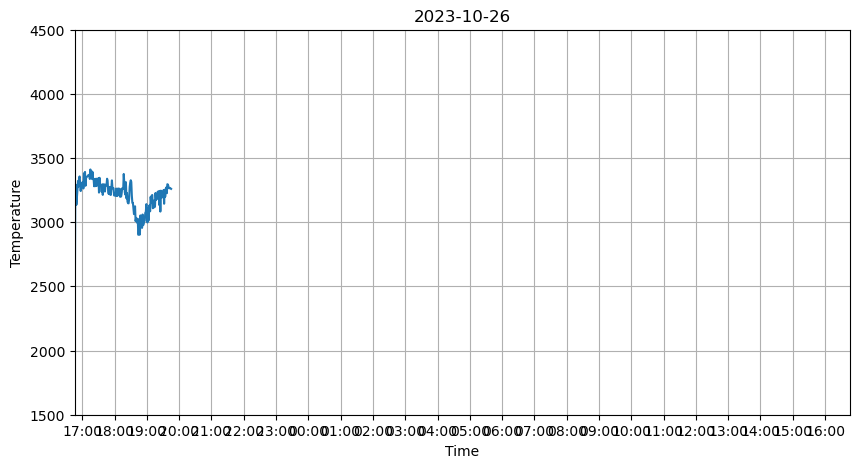

In [113]:
id = 1304

baby = df[df['device_id']==id]
baby.reset_index(drop=True, inplace=True)

del baby['device_id']
del baby['sex']

date_list = baby['updated'].dt.date.astype('str').unique()

print(len(date_list))

for i in range(len(date_list)):
    print(date_list[i])
    draw_graph(date_list[i])
